# Analyzing galaxies in the NDWFS Boötes field

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from time import time
start_time=time()

## Opening file and reading data onto a dataframe

In [2]:
# Selecting columns to read:
columns = ['ID','Z_BEST','Mass_median','Ks_flux','u_rest','R_rest','J_rest','F_MIPS_24','FErr_MIPS_24_u','FErr_MIPS_24_l','F_PACS_100','F_SPIRE_500','AGN','ch1_flux','ch2_flux','ch3_flux','ch4_flux']
start_time1 = time()
# Reading the data:
bootes = pd.read_csv('/home/bruno/Documents/COSMOamautas/boote_catalogue.csv',usecols=columns)
end_time1 = time()
print(f"Creating dataframe took {end_time1-start_time1:.4g} seconds!")
bootes.info()
print(f"Number of galaxies in catalogue: {len(bootes)}")

Creating dataframe took 49.6 seconds!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2214329 entries, 0 to 2214328
Data columns (total 17 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ID              float64
 1   Ks_flux         float64
 2   ch1_flux        float64
 3   ch2_flux        float64
 4   ch3_flux        float64
 5   ch4_flux        float64
 6   F_MIPS_24       float64
 7   FErr_MIPS_24_u  float64
 8   FErr_MIPS_24_l  float64
 9   F_PACS_100      float64
 10  F_SPIRE_500     float64
 11  Z_BEST          float64
 12  AGN             int64  
 13  Mass_median     float64
 14  u_rest          float64
 15  R_rest          float64
 16  J_rest          float64
dtypes: float64(16), int64(1)
memory usage: 287.2 MB
Number of galaxies in catalogue: 2214329


## Getting rid of invalid values

Since we will be selecting galaxies based on their rest-frame u-R and R-J colors, we shall first discard those entries with invalid values in these fields, such as 'nan' or 'inf', as well as those with negative fluxes in the Ks band. Because we are interested in studying galaxies at high redshift, we will also get rid of the entries with redshift values below 0.1.

In [3]:
pd.options.mode.use_inf_as_na = True
bootes.dropna(subset=['u_rest','R_rest','J_rest'],inplace=True)
bootes = bootes[(bootes['Ks_flux']>0) & (bootes['Z_BEST']>=0.1)]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 826375


## Redshift and stellar mass distribution

We can take a look at the distribution of important properties of the galaxies in our sample, such as redshift and stellar mass.

/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:403: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:404: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/bruno/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


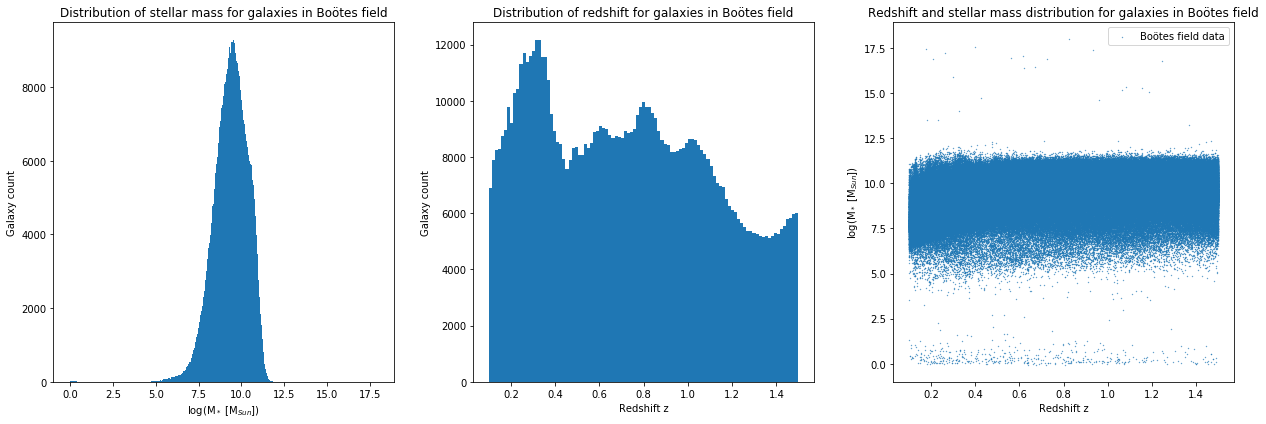

In [4]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{Sun}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['Z_BEST'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax[2].scatter(bootes['Z_BEST'],bootes['Mass_median'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

## Ks magnitude distribution

We can also check the distribution of galaxies according to their flux and magnitude in the Ks band. To obtain the magnitudes in the AB system, we shall create a function to perform the appropriate conversion.

In [5]:
def uJyToAB(fluxuJy):
    '''Converts flux in micro Jansky to AB magnitude, with a zeropoint of ~ 3631 Jansky
    Conversion taken from www.star.bristol.ac.uk/~mbt/stilts/sun256/uk.ac.starlink.ttools.func.Fluxes.html'''
    return 2.5*(23+6-np.log10(fluxuJy))-48.6

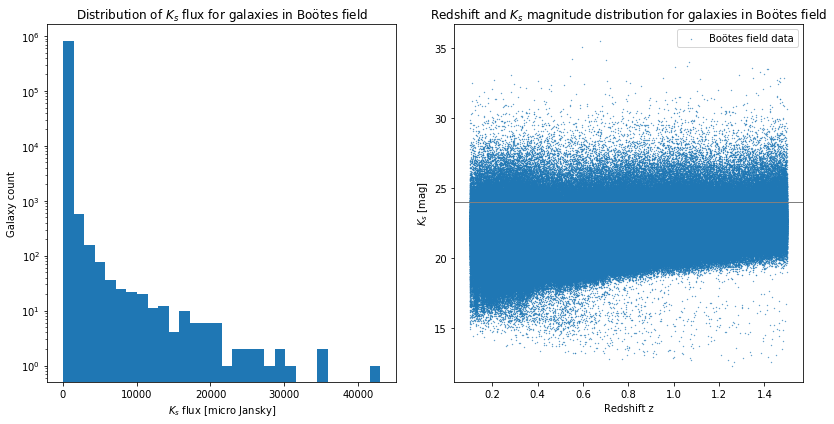

In [6]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
# Plotting Ks flux histogram
ax[0].set_title('Distribution of $K_s$ flux for galaxies in Boötes field')
ax[0].set_xlabel('$K_s$ flux [micro Jansky]')
ax[0].set_ylabel('Galaxy count')
ax[0].set_yscale('log')
ax[0].hist(bootes['Ks_flux'], bins=30)#'auto')
# Plotting Ks magnitude vs Redshift
ax[1].set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax[1].set_xlabel("Redshift z",fontsize=10)
ax[1].set_ylabel("$K_s$ [mag]",fontsize=10)
ax[1].scatter(bootes['Z_BEST'],uJyToAB(bootes['Ks_flux']),s=0.1,label='Boötes field data')
ax[1].axhline(24,color='0.5',linewidth=1)
ax[1].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Because the colors have saturated in the scatter plot, using a 2D histogram allows us to better see the distribution of redshifts and magnitudes.

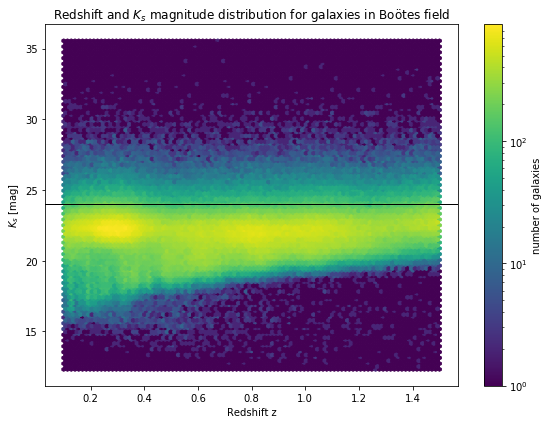

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
# Plotting Ks magnitude vs Redshift
ax.set_title('Redshift and $K_s$ magnitude distribution for galaxies in Boötes field')
ax.set_xlabel("Redshift z",fontsize=10)
ax.set_ylabel("$K_s$ [mag]",fontsize=10)
hb = ax.hexbin(bootes['Z_BEST'],uJyToAB(bootes['Ks_flux']),bins='log',label='Boötes field data')
cb = fig.colorbar(hb, ax=ax)
cb.set_label('number of galaxies')
ax.axhline(24,color='k',linewidth=1)
#ax.legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

Following the sample specifications of Ilbert et al. 2013 and Man et al. 2016, we will limit our sample to those galaxies with Ks < 24. As can be seen in the figure above, the majority of the sample is still included after applying this cut.

In [8]:
# Making cut in Ks magnitude
bootes = bootes[uJyToAB(bootes['Ks_flux'])<24]
print(f"Number of galaxies in sample: {len(bootes)}")

Number of galaxies in sample: 753643


## Exploring color-color space

By choosing three rest-frame bands (for example, u, R and J), we can define two colors which we will use to select galaxies as quiescent or star-forming. In order to have easy acces to these colors for later operations, we will add two new columns to the table based on the values of other columns.

In [9]:
filter1 = 'u'
filter2 = 'R'
filter3 = 'J'
bootes['uR'] = bootes[f'{filter1}_rest']-bootes[f'{filter2}_rest']
bootes['RJ'] = bootes[f'{filter2}_rest']-bootes[f'{filter3}_rest']

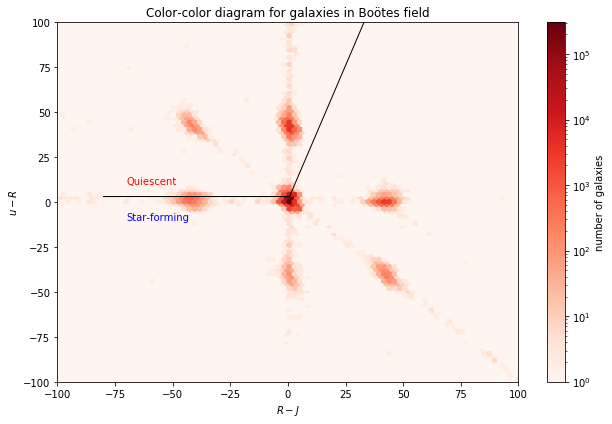

In [10]:
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title('Color-color diagram for galaxies in Boötes field')
ax1.set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
ax1.set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = ax1.hexbin(bootes['RJ'],bootes['uR'],bins='log',cmap='Reds')
cb = fig1.colorbar(hb, ax=ax1)
cb.set_label('number of galaxies')
ax1.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
ax1.set_xlim(xmin=-100,xmax=100)
ax1.set_ylim(ymin=-100,ymax=100)
ax1.text(-70,10,'Quiescent',size=10,color='r')
ax1.text(-70,-10,'Star-forming',size=10,color='b')
fig1.tight_layout()
plt.show()

We see that there is a large spread in the distribution of galaxies in this color-color space, which could be an artifact of the SED fitting used to get the rest-frame magnitudes. We will now restrict our sample to the galaxies within the central region of this plane.

In [11]:
bootes = bootes[
    (bootes['uR']>=-6) &
    (bootes['uR']<=10) &
    (bootes['RJ']>=-5) &
    (bootes['RJ']<=6.5)]
bootes['quiescent'] = (bootes['uR']>3.1)&(bootes['uR']>3*bootes['RJ']+1)

We can calculate the fraction of galaxies within the 'quiescent region', and the fraction of those that have viable data at 24 micron from MIPS.

In [12]:
bootes['lowerF24'] = bootes['F_MIPS_24'] - bootes['FErr_MIPS_24_l']
bootes['upperF24'] = bootes['FErr_MIPS_24_u'] - bootes['F_MIPS_24']

In [13]:
final_sample=len(bootes)
n_quiescent = np.count_nonzero(bootes['quiescent'])
n_star_forming = np.count_nonzero(~bootes['quiescent'])
print(f"Number of galaxies in sample: {final_sample}")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_mass = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['Mass_median'])))
print(f"Fraction of quiescent galaxies with stellar mass data: {q_mass/n_quiescent:.2%}")
q_MIPS = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>0))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}")
print("")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_mass = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['Mass_median'])))
print(f"Fraction of star-forming galaxies with stellar mass data: {sf_mass/n_star_forming:.2%}")
sf_MIPS = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>0))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 716342
Number of quiescent galaxies in the sample: 9621
Fraction of quiescent galaxies with stellar mass data: 90.38%
Fraction of quiescent galaxies with MIPS data: 77.06%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 60.56%
Fraction of quiescent galaxies with MIPS S/N > 5: 14.45%

Number of star-forming galaxies in the sample: 706721
Fraction of star-forming galaxies with stellar mass data: 91.70%
Fraction of star-forming galaxies with MIPS data: 77.28%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 55.44%
Fraction of star-forming galaxies with MIPS S/N > 5: 12.71%


Seeing that our sub-samples have large fractions with stellar mass data, we will now restrict the sample to only include those galaxies with available stellar mass. We will also exclude galaxies with unlikely values of stellar mass, i. e. those below 1000 solar masses.

In [14]:
bootes = bootes[np.isfinite(bootes['Mass_median'])]
bootes = bootes[bootes['Mass_median']>=3]
final_sample=len(bootes)
n_quiescent = np.count_nonzero(bootes['quiescent'])
n_star_forming = np.count_nonzero(~bootes['quiescent'])
print(f"Number of galaxies in sample: {final_sample}")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_mass = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['Mass_median'])))
print(f"Fraction of quiescent galaxies with stellar mass data: {q_mass/n_quiescent:.2%}")
q_MIPS = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>0))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}")
print("")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_mass = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['Mass_median'])))
print(f"Fraction of star-forming galaxies with stellar mass data: {sf_mass/n_star_forming:.2%}")
sf_MIPS = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>0))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 656345
Number of quiescent galaxies in the sample: 8690
Fraction of quiescent galaxies with stellar mass data: 100.00%
Fraction of quiescent galaxies with MIPS data: 77.07%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 60.13%
Fraction of quiescent galaxies with MIPS S/N > 5: 13.83%

Number of star-forming galaxies in the sample: 647655
Fraction of star-forming galaxies with stellar mass data: 100.00%
Fraction of star-forming galaxies with MIPS data: 77.41%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 54.67%
Fraction of star-forming galaxies with MIPS S/N > 5: 12.15%


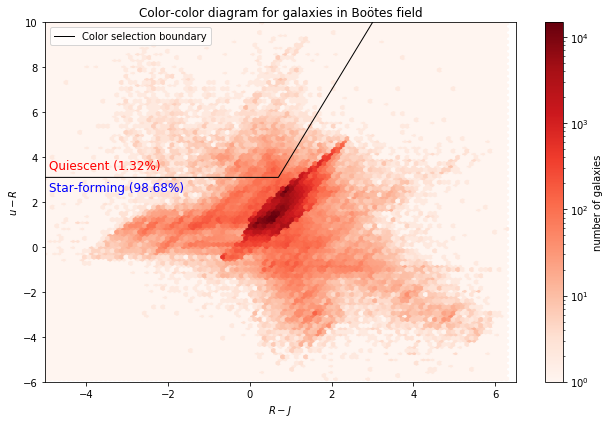

In [15]:
fig1, ax1 = plt.subplots(figsize=(9,6))
ax1.set_title('Color-color diagram for galaxies in Boötes field')
ax1.set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
ax1.set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
hb = ax1.hexbin(bootes['RJ'],bootes['uR'],bins='log',cmap='Reds')
cb = fig1.colorbar(hb, ax=ax1)
cb.set_label('number of galaxies')
ax1.plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
ax1.legend(numpoints=1, loc='best')
ax1.set_xlim(xmin=-5,xmax=6.5)
ax1.set_ylim(ymin=-6,ymax=10)
ax1.text(-4.9,3.5,f"Quiescent ({n_quiescent/final_sample:.2%})",size=12,color='r')
ax1.text(-4.9,2.5,f"Star-forming ({n_star_forming/final_sample:.2%})",size=12,color='b')
fig1.tight_layout()
plt.show()

Now we can take a look at the redshift and stellar mass distributions of our narrowed down sample.

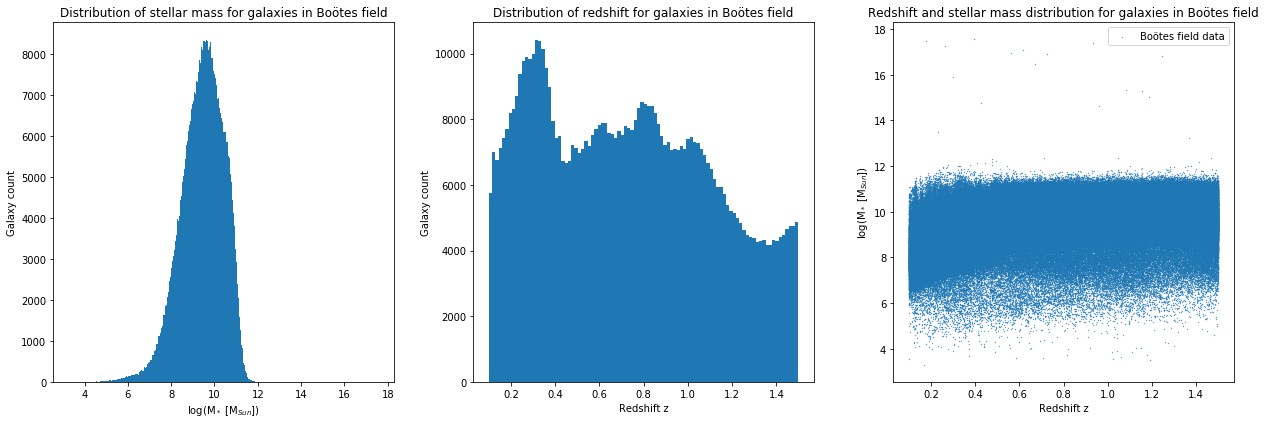

In [16]:
fig, ax = plt.subplots(1,3,figsize=(18,6))
# Plotting stellar mass histogram
ax[0].set_title('Distribution of stellar mass for galaxies in Boötes field')
ax[0].set_xlabel('log(M$_*$ [M$_{Sun}$])')
ax[0].set_ylabel('Galaxy count')
ax[0].hist(bootes['Mass_median'], 'auto')
# Plotting redshift histogram
ax[1].set_title('Distribution of redshift for galaxies in Boötes field')
ax[1].set_xlabel('Redshift z')
ax[1].set_ylabel('Galaxy count')
ax[1].hist(bootes['Z_BEST'], 'auto')
# Plotting Stellar mass vs Redshift
ax[2].set_title('Redshift and stellar mass distribution for galaxies in Boötes field')
ax[2].set_xlabel("Redshift z",fontsize=10)
ax[2].set_ylabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax[2].scatter(bootes['Z_BEST'],bootes['Mass_median'],s=0.1,label='Boötes field data')
ax[2].legend(numpoints=1, loc='best')
fig.tight_layout()
plt.show()

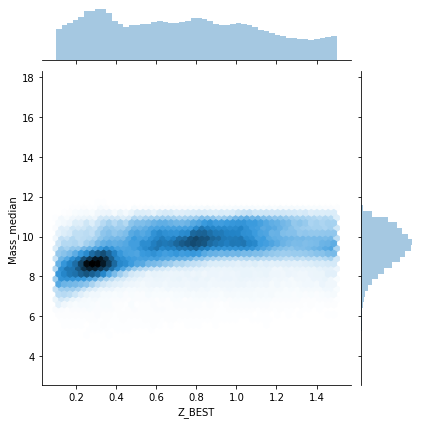

In [17]:
sns.jointplot(x=bootes['Z_BEST'], y=bootes['Mass_median'], kind="hex")#, color="k")

We can also see how the color-color diagram looks like after dividing the sample in three redshift bins.

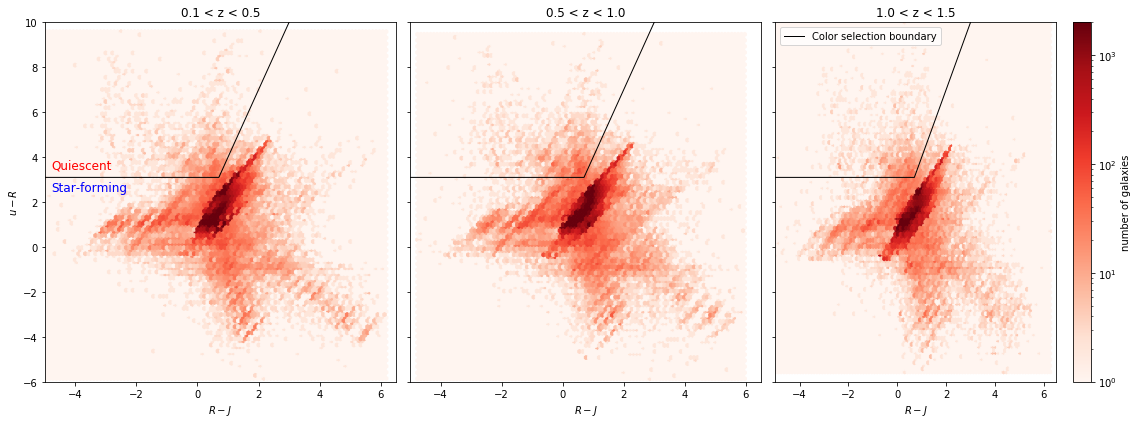

In [32]:
fig1, ax1 = plt.subplots(1,3,sharey='row',figsize=(16,6))
#fig1.suptitle('Color-color diagrams for different redshift bins')
fig1.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.1,0.5,1.0],[0.5,1.0,1.5]):
    ax1[n].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
    xdata = bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax),'RJ']
    ydata = bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax),'uR']
    hb = ax1[n].hexbin(xdata,ydata,bins='log',cmap='Reds',vmax=2000)
    ax1[n].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
    ax1[n].set_xlim(xmin=-5,xmax=6.5)
    ax1[n].set_ylim(ymin=-6,ymax=10)
    ax1[n].set_title(f"{zmin} < z < {zmax}")
cb = fig1.colorbar(hb, ax=ax1[2])
cb.set_label('number of galaxies')
ax1[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
ax1[2].legend(numpoints=1, loc='best')
ax1[0].text(-4.8,3.5,'Quiescent',size=12,color='r')
ax1[0].text(-4.8,2.5,'Star-forming',size=12,color='b')
fig1.tight_layout()
plt.show()

## Estimating SFRs from MIPS 24 micron flux

Now we will estimate the star formation rate of individually detected galaxies with the 24 micron flux calibration by Rujopakarn et al. 2013.

In [19]:
from scipy.interpolate import interp1d
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

z = np.array([0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8])
Az = np.array([2.656,2.35,2.06,2.012,1.659,1.296,1.137,1.039,1.015,0.934,0.922,0.896,0.837,0.768,0.655])
Bz = np.array([0.975,1.02,1.056,1.065,1.094,1.129,1.159,1.179,1.165,1.149,1.145,1.149,1.158,1.175,1.198])
Az_intrp = interp1d(z, Az, kind='cubic')
Bz_intrp = interp1d(z, Bz, kind='cubic')

In [20]:
def F24_to_LIR(flux, zobj):
    '''Convert Spitzer/MIPS 24 micron flux and redshift to total IR
    luminosity according to Rujopakarn et al. (2013)    
    Input: flux in microJy, redshift
    Output: LIR in Lsun
    '''
    if (~np.isfinite(flux))|(zobj==0):
        return np.nan
    elif flux>0:
        Mpc_to_cm = 3.08568025*(10**24) # 1 Mpc in cm
        microJy_to_Jy = 10**(-6)        # 1 mJy in Jy
        D_L = cosmo.luminosity_distance(zobj).value*Mpc_to_cm # Luminosity distance in cm
        
        logLIR = Az_intrp(zobj) + Bz_intrp(zobj)*(np.log10(flux*microJy_to_Jy*4*np.pi*(D_L**2)) - 45)
        return 10**logLIR
    else:
        return np.nan

def LIR_to_SFR(LIR):
    '''Convert LIR to SFR
    Input: LIR in Lsun
    Output: SFR in Msun/yr (Kroupa 2002 IMF)
    NOTE: This conversion is calibrated for LIR > 5*10^9, if given a lower value it will return an extrapolation
    '''
    if ~np.isfinite(LIR):
        return np.nan
    else:
        L24 = 10**((np.log10(LIR) - 1.096)/0.982)
        
        if (LIR < 1.3*10**12):
            SFR = L24*7.8*10**(-10)
        else:
            SFR = (L24*7.8*10**(-10))*(L24*6.2*10**(-12))**0.048
        return SFR

In [21]:
bootes['LIR_24'] = pd.Series([F24_to_LIR(flux,zobj) for flux, zobj in zip(bootes['F_MIPS_24'],bootes['Z_BEST'])],index=bootes.index)

bootes['SFR_24'] = bootes['LIR_24'].apply(LIR_to_SFR)#pd.Series([LIR_to_SFR(LIR) for LIR in bootes['LIR_24']])

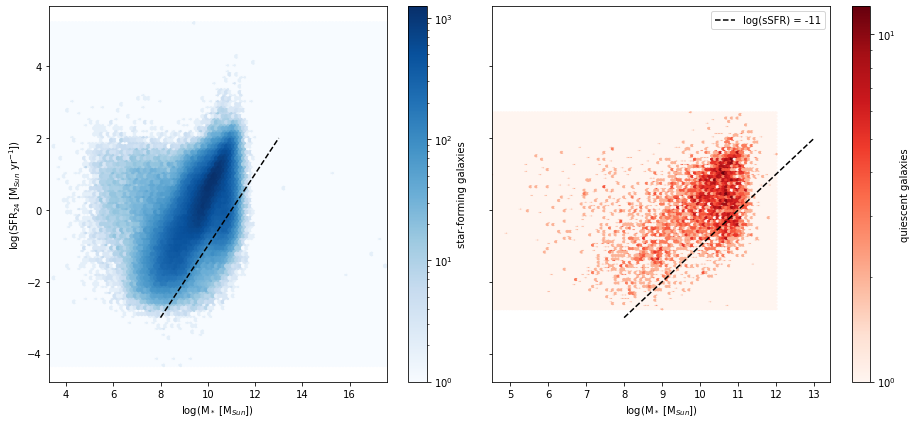

In [22]:
#%% Plotting Star formation rate vs Stellar mass
fig3, ax3 = plt.subplots(1,2,sharey='row',figsize=(13,6))
#ax3.set_title('Stellar mass and star formation rate distribution for galaxies in the Boötes field')
ax3[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax3[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = ax3[0].hexbin(bootes.loc[~bootes['quiescent'],'Mass_median'],
            np.log10(bootes.loc[~bootes['quiescent'],'SFR_24']),
            cmap='Blues',bins='log')
cb = fig3.colorbar(hb, ax=ax3[0])
cb.set_label('star-forming galaxies')
ax3[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
ax3[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = ax3[1].hexbin(bootes.loc[bootes['quiescent'],'Mass_median'],
            np.log10(bootes.loc[bootes['quiescent'],'SFR_24']),
            cmap='Reds',bins='log')
cb = fig3.colorbar(hb, ax=ax3[1])
cb.set_label('quiescent galaxies')
ax3[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#ax3.set_xlim(xmin=10.7,xmax=13)
#ax3.set_ylim(ymin=-3,ymax=7)
ax3[1].legend(numpoints=1, loc='best')
fig3.tight_layout()
plt.show()

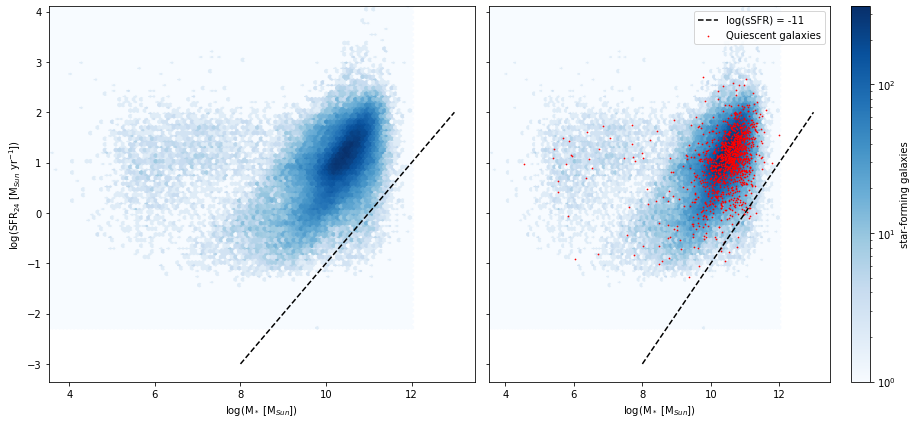

In [23]:
#%% Plotting Star formation rate vs Stellar mass
fig3, ax3 = plt.subplots(1,2,sharey='row',figsize=(13,6))
#ax3.set_title('Stellar mass and star formation rate distribution for galaxies in the Boötes field')
ax3[0].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
ax3[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
hb = ax3[0].hexbin(bootes.loc[~bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
            np.log10(bootes.loc[~bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
            cmap='Blues',bins='log')
ax3[0].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
ax3[1].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
hb = ax3[1].hexbin(bootes.loc[~bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
            np.log10(bootes.loc[~bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
            cmap='Blues',bins='log')
cb = fig3.colorbar(hb, ax=ax3[1])
cb.set_label('star-forming galaxies')
ax3[1].scatter(bootes.loc[bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
            np.log10(bootes.loc[bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
            s=0.5,color='r',label='Quiescent galaxies')
ax3[1].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
#ax3.set_xlim(xmin=10.7,xmax=13)
#ax3.set_ylim(ymin=-3,ymax=7)
ax3[1].legend(numpoints=1, loc='best')
fig3.tight_layout()
plt.show()

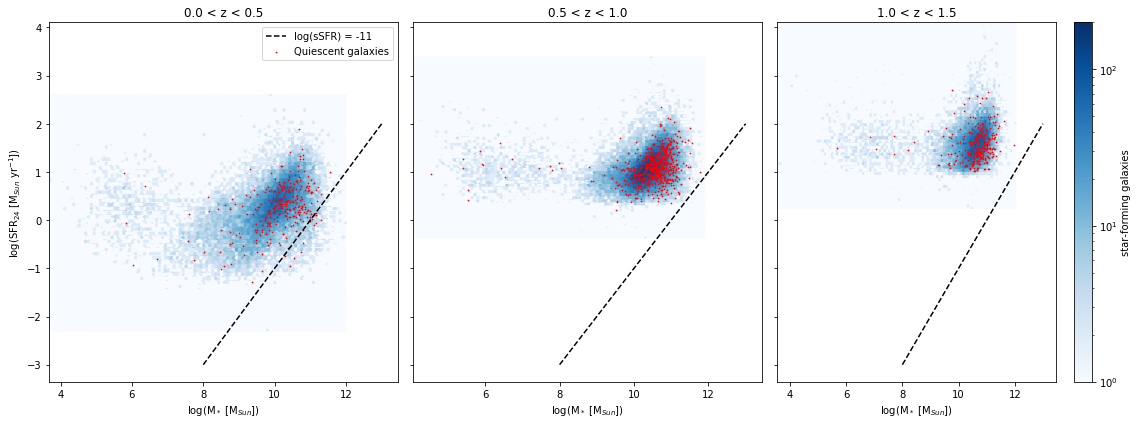

In [24]:
fig1, ax1 = plt.subplots(1,3,sharey='row',figsize=(16,6))
#fig1.suptitle('Stellar mass vs SFR for different redshift bins')
fig1.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.0,0.5,1.0],[0.5,1.0,1.5]):
    ax1[n].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    hb = ax1[n].hexbin(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
                   np.log10(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
                   cmap='Blues',bins='log',vmax=200)
    ax1[n].scatter(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
                   np.log10(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
                   s=0.5,color='r',label='Quiescent galaxies')
    ax1[n].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    #ax1[n].set_xlim(xmin=10.7,xmax=13)
    #ax1[n].set_ylim(ymin=-3,ymax=7)
    ax1[n].set_title(f"{zmin} < z < {zmax}")

cb = fig1.colorbar(hb, ax=ax1[2])
cb.set_label('star-forming galaxies')
ax1[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
ax1[0].legend(numpoints=1, loc='best')
fig1.tight_layout()
plt.show()

In [25]:
q_PACS = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['F_PACS_100'])))
print(f"Fraction of quiescent galaxies with PACS data: {q_PACS/n_quiescent:.2%}")
sf_PACS = np.count_nonzero(~bootes['quiescent']&(np.isfinite(bootes['F_PACS_100'])))
print(f"Fraction of star forming galaxies with PACS data: {sf_PACS/n_star_forming:.2%}")
print("")
q_SPIRE = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['F_SPIRE_500'])))
print(f"Fraction of quiescent galaxies with SPIRE data: {q_SPIRE/n_quiescent:.2%}")
sf_SPIRE = np.count_nonzero(~bootes['quiescent']&(np.isfinite(bootes['F_SPIRE_500'])))
print(f"Fraction of star forming galaxies with SPIRE data: {sf_SPIRE/n_star_forming:.2%}")

Fraction of quiescent galaxies with PACS data: 33.30%
Fraction of star forming galaxies with PACS data: 29.48%

Fraction of quiescent galaxies with SPIRE data: 34.12%
Fraction of star forming galaxies with SPIRE data: 30.64%


## Getting rid of luminous AGN

We will now discard luminous AGN which may be contaminating our primarily star-forming sample. 

In [27]:
bootes['x'] = np.log10(bootes['ch3_flux']/bootes['ch1_flux'])
bootes['y'] = np.log10(bootes['ch4_flux']/bootes['ch2_flux'])

DonleyAGN=np.count_nonzero((bootes['x']>=0.08)&
                           (bootes['y']>=0.15)&
                           (bootes['y']>=1.21*bootes['x']-0.27)&
                           (bootes['y']<=1.21*bootes['x']+0.27)&
                           (bootes['ch2_flux']>bootes['ch1_flux'])&
                           (bootes['ch3_flux']>bootes['ch2_flux'])&
                           (bootes['ch4_flux']>bootes['ch3_flux']))

print(f"Galaxies marked as AGN in the catalogue: {np.count_nonzero(bootes['AGN']==1)}")
print(f"Galaxies that meet the Donley et al. (2012) IR AGN criteria: {DonleyAGN}")

Galaxies marked as AGN in the catalogue: 3519
Galaxies that meet the Donley et al. (2012) IR AGN criteria: 6830


/home/bruno/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [28]:
np.count_nonzero((bootes['x']>=0.08)&
                           (bootes['y']>=0.15)&
                           (bootes['y']>=1.21*bootes['x']-0.27)&
                           (bootes['y']<=1.21*bootes['x']+0.27)&
                           (bootes['ch2_flux']>bootes['ch1_flux'])&
                           (bootes['ch3_flux']>bootes['ch2_flux'])&
                           (bootes['ch4_flux']>bootes['ch3_flux'])&(bootes['AGN']==1))

2544

In [29]:
bootes = bootes[~((bootes['x']>=0.08)&
                           (bootes['y']>=0.15)&
                           (bootes['y']>=1.21*bootes['x']-0.27)&
                           (bootes['y']<=1.21*bootes['x']+0.27)&
                           (bootes['ch2_flux']>bootes['ch1_flux'])&
                           (bootes['ch3_flux']>bootes['ch2_flux'])&
                           (bootes['ch4_flux']>bootes['ch3_flux']))]

In [30]:
final_sample=len(bootes)
n_quiescent = np.count_nonzero(bootes['quiescent'])
n_star_forming = np.count_nonzero(~bootes['quiescent'])
print(f"Number of galaxies in sample: {final_sample}")
print(f"Number of quiescent galaxies in the sample: {n_quiescent}")
q_mass = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['Mass_median'])))
q_MIPS = np.count_nonzero(bootes['quiescent']&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of quiescent galaxies with MIPS data: {q_MIPS/n_quiescent:.2%}")
q_MIPSgt0 = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>0))
print(f"Fraction of quiescent galaxies with MIPS flux > 0 uJy: {q_MIPSgt0/n_quiescent:.2%}")
q_MIPSSN = np.count_nonzero(bootes['quiescent']&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of quiescent galaxies with MIPS S/N > 5: {q_MIPSSN/n_quiescent:.2%}")
print("")
print(f"Number of star-forming galaxies in the sample: {n_star_forming}")
sf_mass = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['Mass_median'])))
sf_MIPS = np.count_nonzero((~bootes['quiescent'])&(np.isfinite(bootes['F_MIPS_24'])))
print(f"Fraction of star-forming galaxies with MIPS data: {sf_MIPS/n_star_forming:.2%}")
sf_MIPSgt0 = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>0))
print(f"Fraction of star-forming galaxies with MIPS flux > 0 uJy: {sf_MIPSgt0/n_star_forming:.2%}")
sf_MIPSSN = np.count_nonzero((~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']))
print(f"Fraction of star-forming galaxies with MIPS S/N > 5: {sf_MIPSSN/n_star_forming:.2%}")

Number of galaxies in sample: 649515
Number of quiescent galaxies in the sample: 8629
Fraction of quiescent galaxies with MIPS data: 77.11%
Fraction of quiescent galaxies with MIPS flux > 0 uJy: 60.06%
Fraction of quiescent galaxies with MIPS S/N > 5: 13.84%

Number of star-forming galaxies in the sample: 640886
Fraction of star-forming galaxies with MIPS data: 77.41%
Fraction of star-forming galaxies with MIPS flux > 0 uJy: 54.46%
Fraction of star-forming galaxies with MIPS S/N > 5: 12.02%


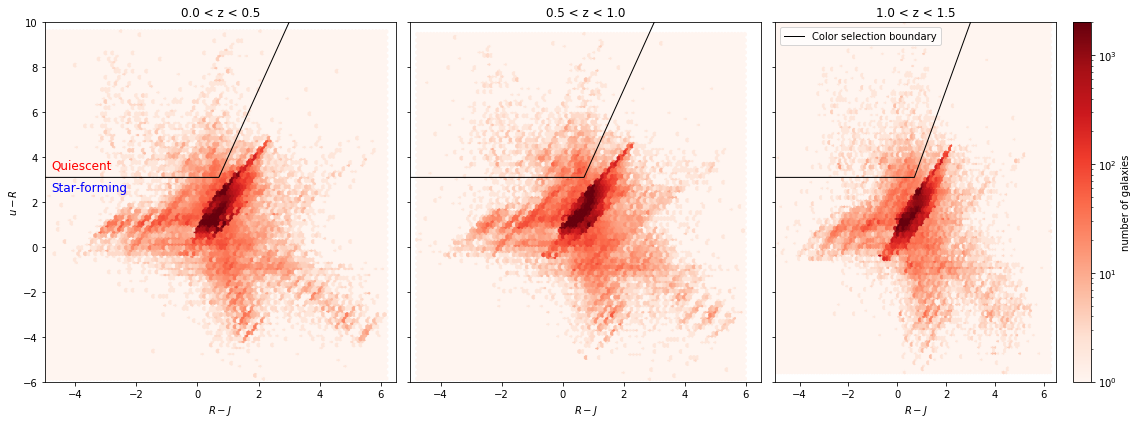

In [33]:
fig1, ax1 = plt.subplots(1,3,sharey='row',figsize=(16,6))
#fig1.suptitle('Color-color diagrams for different redshift bins')
fig1.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.0,0.5,1.0],[0.5,1.0,1.5]):
    ax1[n].set_xlabel(f"${filter2}-{filter3}$",fontsize=10)
    xdata = bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax),'RJ']
    ydata = bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax),'uR']
    hb = ax1[n].hexbin(xdata,ydata,bins='log',cmap='Reds',vmax=2000)
    ax1[n].plot([-80,0.7,80],[3.1,3.1,241],color='k',linewidth=1,label='Color selection boundary')
    ax1[n].set_xlim(xmin=-5,xmax=6.5)
    ax1[n].set_ylim(ymin=-6,ymax=10)
    ax1[n].set_title(f"{zmin} < z < {zmax}")
cb = fig1.colorbar(hb, ax=ax1[2])
cb.set_label('number of galaxies')
ax1[0].set_ylabel(f"${filter1}-{filter2}$",fontsize=10)
ax1[2].legend(numpoints=1, loc='best')
ax1[0].text(-4.8,3.5,'Quiescent',size=12,color='r')
ax1[0].text(-4.8,2.5,'Star-forming',size=12,color='b')
fig1.tight_layout()
plt.show()

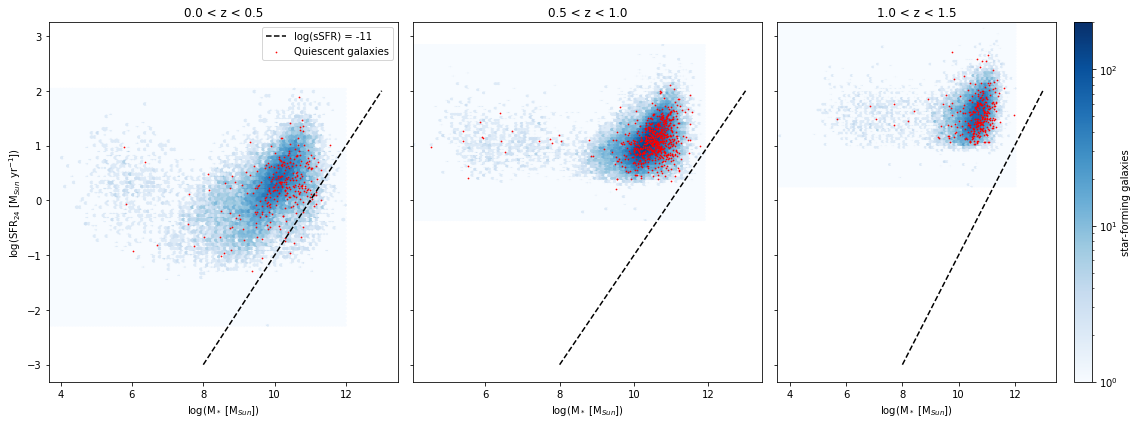

In [34]:
fig1, ax1 = plt.subplots(1,3,sharey='row',figsize=(16,6))
#fig1.suptitle('Stellar mass vs SFR for different redshift bins')
fig1.subplots_adjust(wspace=0)
for n, zmin, zmax in zip([0,1,2],[0.0,0.5,1.0],[0.5,1.0,1.5]):
    ax1[n].set_xlabel("log(M$_*$ [M$_{Sun}$])",fontsize=10)
    hb = ax1[n].hexbin(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
                   np.log10(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(~bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
                   cmap='Blues',bins='log',vmax=200)
    ax1[n].scatter(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'Mass_median'],
                   np.log10(bootes.loc[(bootes['Z_BEST']>=zmin)&(bootes['Z_BEST']<zmax)&(bootes['quiescent'])&(bootes['F_MIPS_24']>5*bootes['upperF24'])&(bootes['F_MIPS_24']>5*bootes['lowerF24']),'SFR_24']),
                   s=0.5,color='r',label='Quiescent galaxies')
    ax1[n].plot([8,13],[-3,2],'--',color='k',label='log(sSFR) = -11')
    #ax1[n].set_xlim(xmin=10.7,xmax=13)
    #ax1[n].set_ylim(ymin=-3,ymax=7)
    ax1[n].set_title(f"{zmin} < z < {zmax}")

cb = fig1.colorbar(hb, ax=ax1[2])
cb.set_label('star-forming galaxies')
ax1[0].set_ylabel("log(SFR$_{24}$ [M$_{Sun}$ yr$^{-1}$])",fontsize=10)
ax1[0].legend(numpoints=1, loc='best')
fig1.tight_layout()
plt.show()

In [54]:
end_time=time()
print("Running notebook took {:.4g} seconds!".format(end_time-start_time))

Running notebook took 2841 seconds!


In [43]:
print(np.count_nonzero(np.isnan(bootes['F_MIPS_24'])|(bootes['F_MIPS_24']<=0)))
print(np.count_nonzero((np.isnan(bootes['F_MIPS_24'])|(bootes['Z_BEST']==0)|(bootes['F_MIPS_24']<=0))&np.isfinite(bootes['LIR_24'])))
print(np.count_nonzero((np.isfinite(bootes['F_MIPS_24'])&(bootes['Z_BEST']!=0)&(bootes['F_MIPS_24']>0))&np.isnan(bootes['LIR_24'])))
print(np.count_nonzero(np.isnan(bootes['F_MIPS_24'])|(bootes['Z_BEST']==0)|(bootes['F_MIPS_24']<=0)))
print(np.count_nonzero((np.isnan(bootes['F_MIPS_24'])|(bootes['F_MIPS_24']<=0))&(bootes['Z_BEST']==0)))
print(np.count_nonzero((np.isnan(bootes['F_MIPS_24'])|(bootes['F_MIPS_24']<=0))&(bootes['Z_BEST']!=0)))
print(np.count_nonzero(np.isnan(bootes['LIR_24'])))
print(np.count_nonzero((bootes['Z_BEST']>=0.1)&(bootes['AGN']!=0)))

312634
0
0
312877
150
312484
312877
3530
